In [20]:
# 3 (시계열 회귀분석). R에서 AirPassengers 데이터를 다음의 방법으로 불러온다.
# data(AirPassengers)
# R을 활용하여 다음의 분석을 진행한다.
AirPassengers

AP <- as.numeric(AirPassengers)
time <- 1:length(AP)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144

In [11]:
# (a) 시간에 대한 2차 추세선형모형을 가정하고 시계열회귀를 적합하라. 
# 선형모형의 계수를 제시하고 잔차항에 대하여 acf (자기상관계수)의 그림을 그려라.
fit1 = lm(AP ~ time)
pr1 = predict(fit1)
summary(fit1)


Call:
lm(formula = AP ~ time)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.858 -30.727  -5.757  24.489 164.999 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 87.65278    7.71635   11.36   <2e-16 ***
time         2.65718    0.09233   28.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 46.06 on 142 degrees of freedom
Multiple R-squared:  0.8536,	Adjusted R-squared:  0.8526 
F-statistic: 828.2 on 1 and 142 DF,  p-value: < 2.2e-16


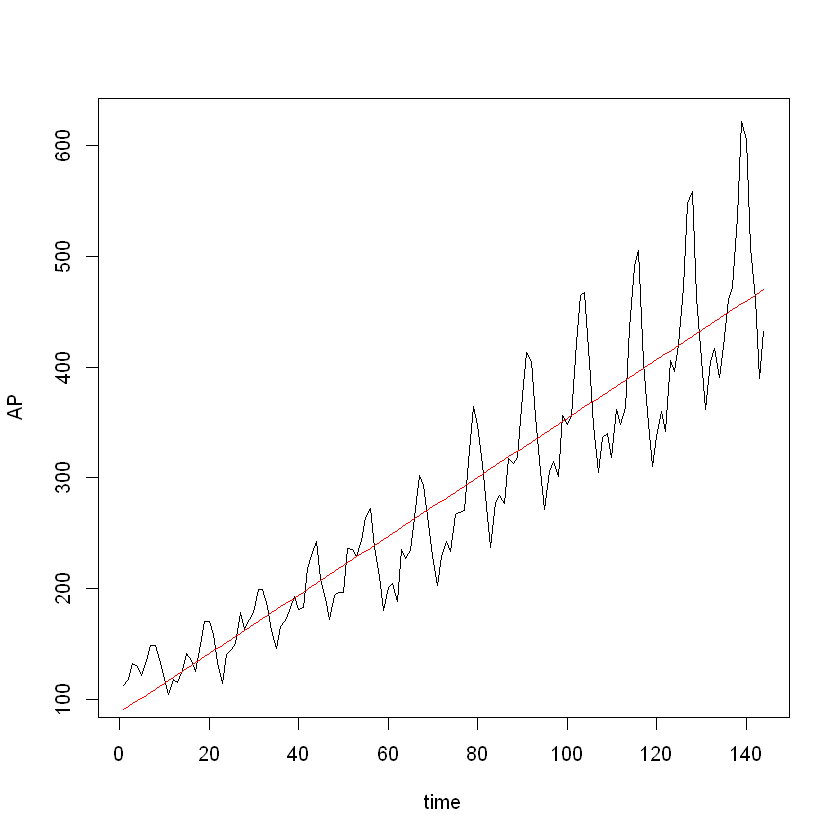

In [12]:
plot(AP ~ time, type="l")
lines(pr1 ~ time, col=2)

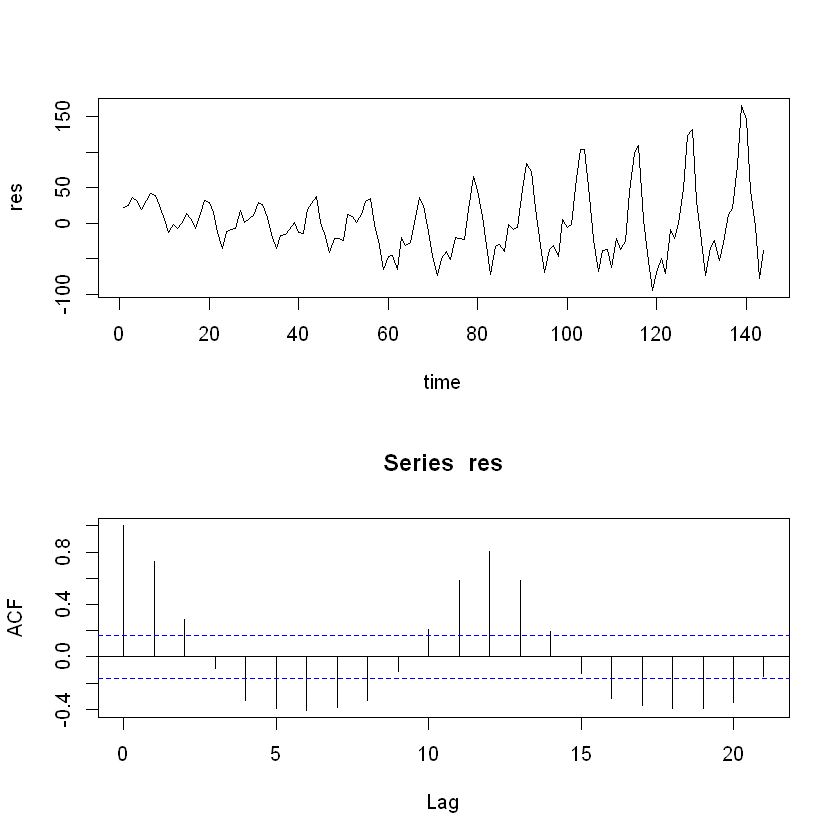

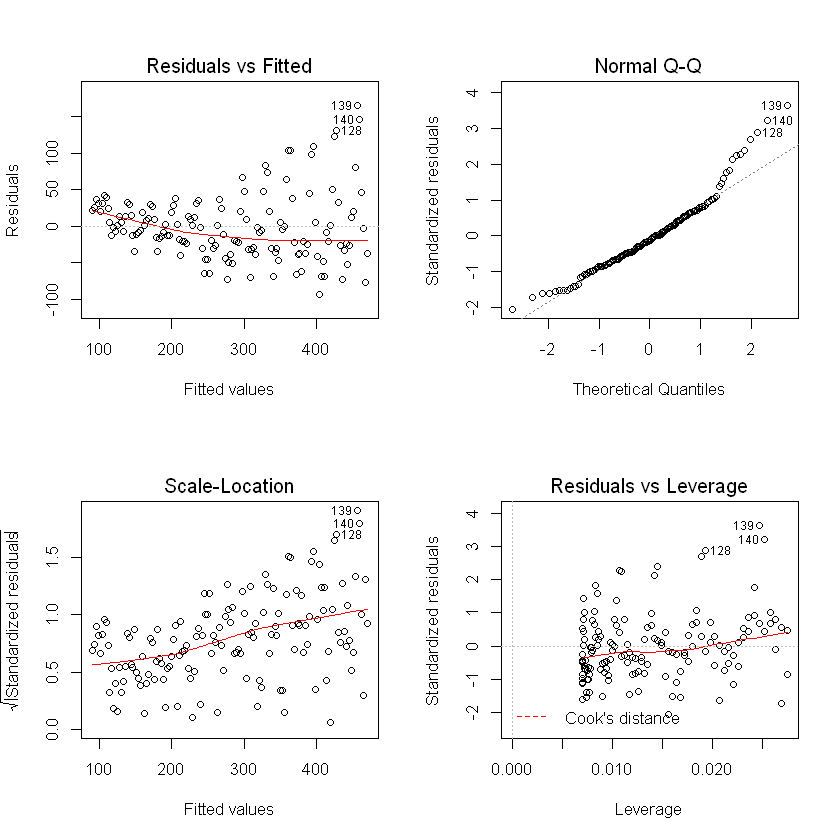

In [13]:
layout(mat=matrix(c(1,
                    2), nrow=2, byrow = TRUE))
res = resid(fit1)

plot(res ~ time,type="l")

acf(res)

layout(mat=matrix(c(1, 2,
                    3, 4), nrow=2, byrow = TRUE))
plot(fit1)

In [32]:
# (b) 계절요인 반영을 위한 가변수 시계열모형을 적합하고 결과값을 제시하고 잔차항에 대하여 acf (자기상관계수)의 그림을 그려라.
time2 <- time^2
month <- as.factor(rep(1:12,12))
year <- as.factor(rep(1949:1960, each = 12))
fit2 = lm(AP ~ time + time2 + year + month)
summary(fit2)


Call:
lm(formula = AP ~ time + time2 + year + month)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.694 -10.550   0.057  11.246  73.791 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  99.575603  11.355044   8.769 1.43e-14 ***
time         -0.388127   1.302059  -0.298  0.76615    
time2         0.015268   0.006746   2.263  0.02542 *  
year1950     13.077070  17.031156   0.768  0.44410    
year1951     39.256907  28.643780   1.371  0.17308    
year1952     57.372846  39.874349   1.439  0.15280    
year1953     72.258220  50.305074   1.436  0.15349    
year1954     68.663028  59.975620   1.145  0.25455    
year1955     91.837270  69.041555   1.330  0.18598    
year1956    109.780947  77.714765   1.413  0.16036    
year1957    119.244058  86.245410   1.383  0.16935    
year1958     96.726604  94.910990   1.019  0.31019    
year1959    104.561918 104.004869   1.005  0.31675    
year1960    108.500000 113

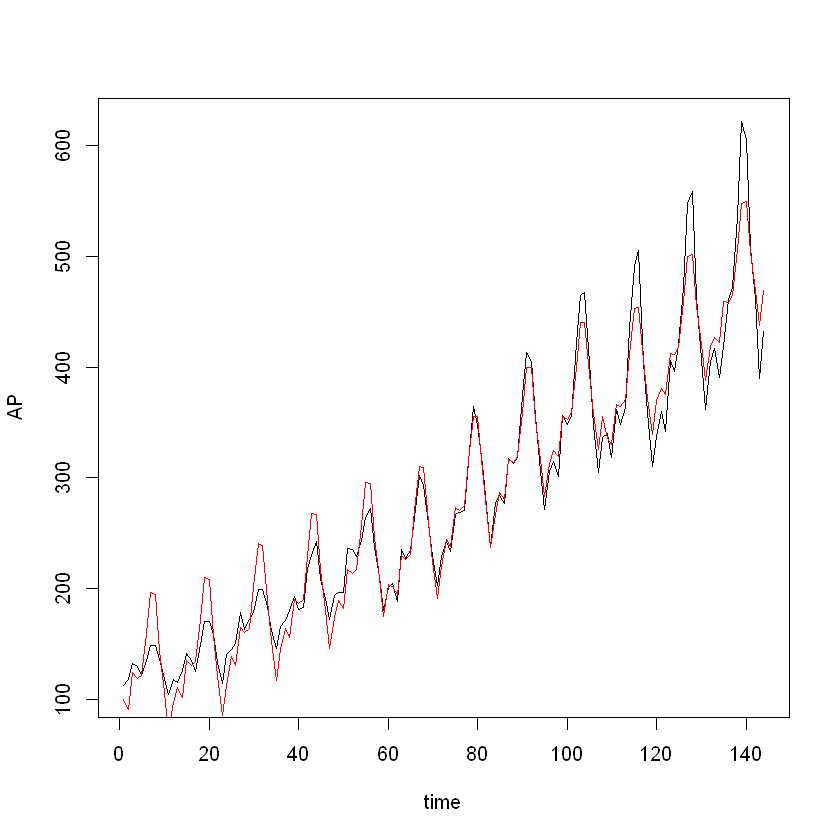

In [31]:
pr2 = predict(fit2)
plot(AP ~ time, type="l")
lines(pr2 ~ time, col=2)

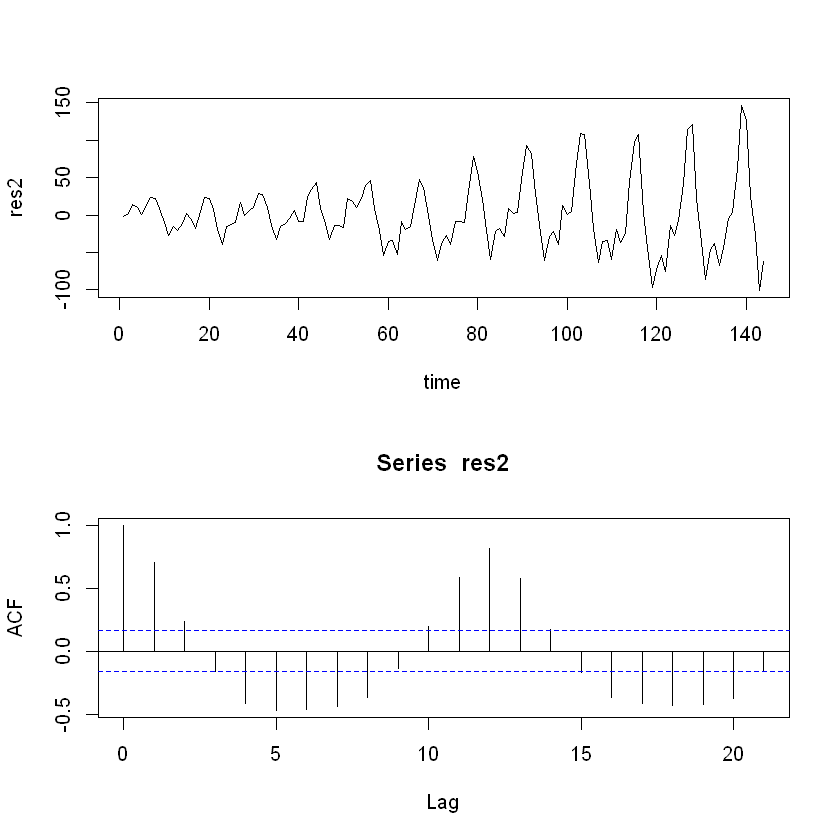

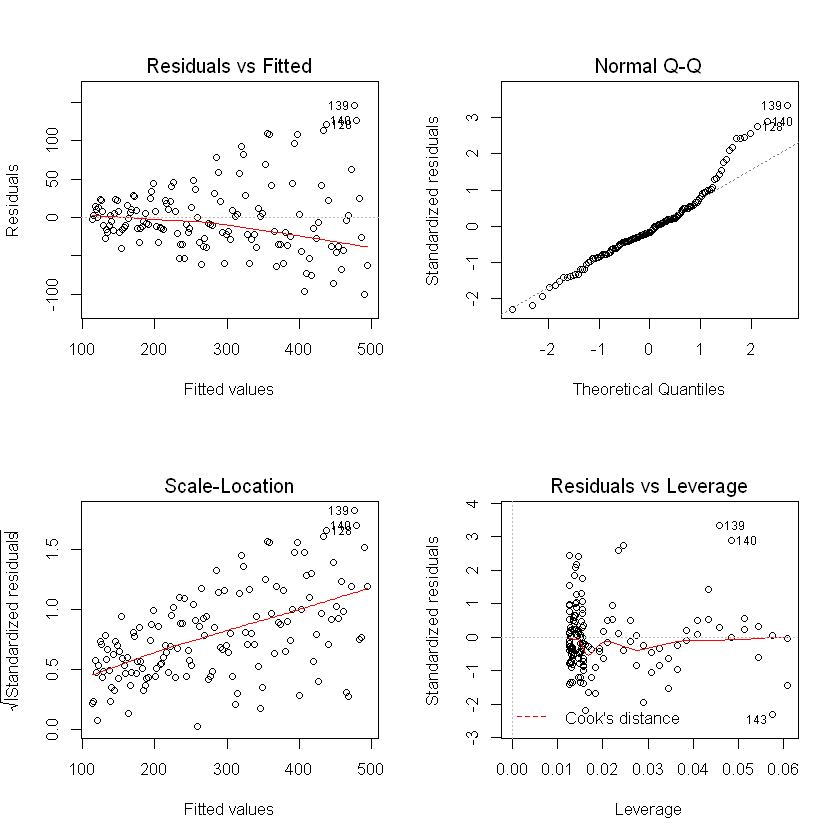

In [15]:
layout(mat = matrix(c(1,
                      2), nrow=2, byrow = TRUE))
res2 = resid(fit2)

plot(res2 ~ time,type="l")

acf(res2)

layout(mat = matrix(c(1, 2,
                      3, 4), nrow=2, byrow = TRUE))
plot(fit2)

In [40]:
# (c) 삼각함수를 이용한 시계열모형을 적합하고 결과값을 제시하고 잔차항에 대하여 acf (자기상관계수)의 그림을 그려라.
# 이때 시간과 삼각함수 간 교호작용이 있는 경우와 없는 경우를 나누어 분석을 진행하라.

sint1 <- sin(time)
sint2 <- sin(time/2)
sint4 <- sin(time/4)
sint8 <- sin(time/8)

In [45]:
fit3 = lm(AP ~ time + sint2 + sint1 + year + month)
pr3 = predict(fit3)
summary(fit3)


Call:
lm(formula = AP ~ time + sint2 + sint1 + year + month)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.012 -11.227   0.825  11.787  73.016 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  92.8064     9.3335   9.943  < 2e-16 ***
time          1.9417     0.8119   2.391  0.01835 *  
sint2        12.7812     3.1334   4.079 8.21e-05 ***
sint1         5.6105     2.5825   2.173  0.03180 *  
year1950    -10.6236    13.2156  -0.804  0.42308    
year1951     -3.7096    21.4383  -0.173  0.86292    
year1952     -0.3733    30.5685  -0.012  0.99028    
year1953      4.2470    39.9882   0.106  0.91560    
year1954     -5.0991    49.5319  -0.103  0.91818    
year1955     16.8110    59.1395   0.284  0.77671    
year1956     37.9327    68.7844   0.551  0.58234    
year1957     54.9688    78.4536   0.701  0.48489    
year1958     44.3835    88.1395   0.504  0.61550    
year1959     68.4955    97.8375   0.700  0.485

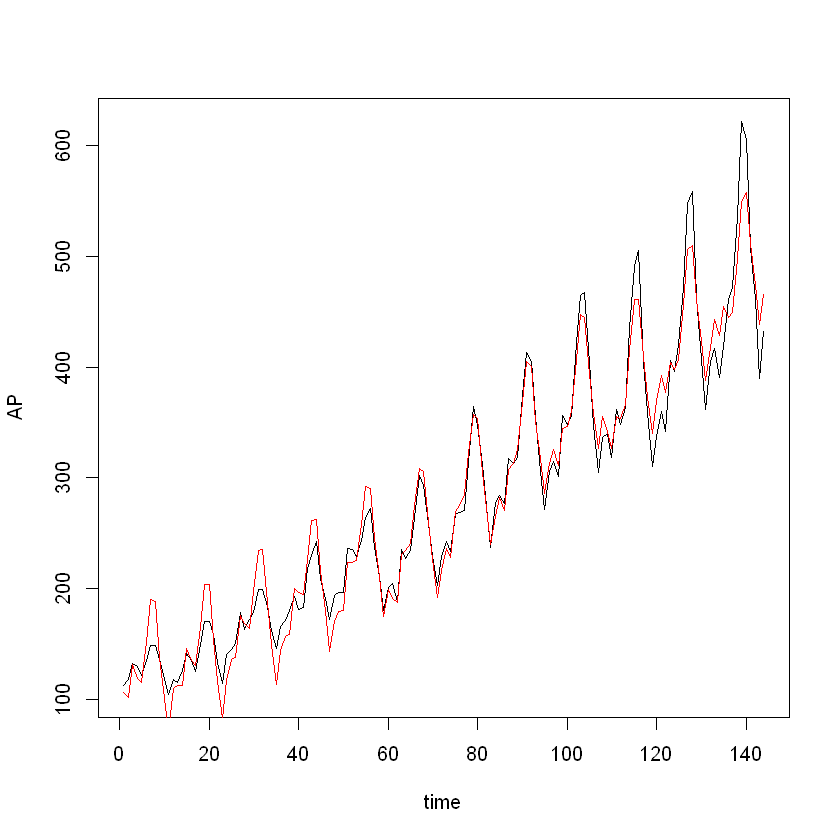

In [46]:
plot(AP ~ time, type="l")
lines(pr3 ~ time, col=2)

In [49]:
fit4 = lm(AP ~ time + (time * sint2) + (time2 * sint1) + year + month)
pr4 = predict(fit4)
summary(fit4)


Call:
lm(formula = AP ~ time + (time * sint2) + (time2 * sint1) + year + 
    month)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.261 -11.974   1.856  10.362  59.938 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  97.498907  10.629173   9.173 2.06e-15 ***
time          0.879482   1.624310   0.541 0.589236    
sint2       -13.552510   7.704168  -1.759 0.081195 .  
time2         0.003753   0.009764   0.384 0.701396    
sint1        -4.238800   4.067050  -1.042 0.299472    
year1950      1.568823  18.868120   0.083 0.933878    
year1951     19.299033  32.717024   0.590 0.556420    
year1952     31.995074  44.827429   0.714 0.476822    
year1953     44.564385  54.978828   0.811 0.419270    
year1954     41.917635  63.321345   0.662 0.509295    
year1955     69.491593  70.139715   0.991 0.323865    
year1956     95.419395  75.825929   1.258 0.210774    
year1957    116.468161  80.884928   1.440 0.15258

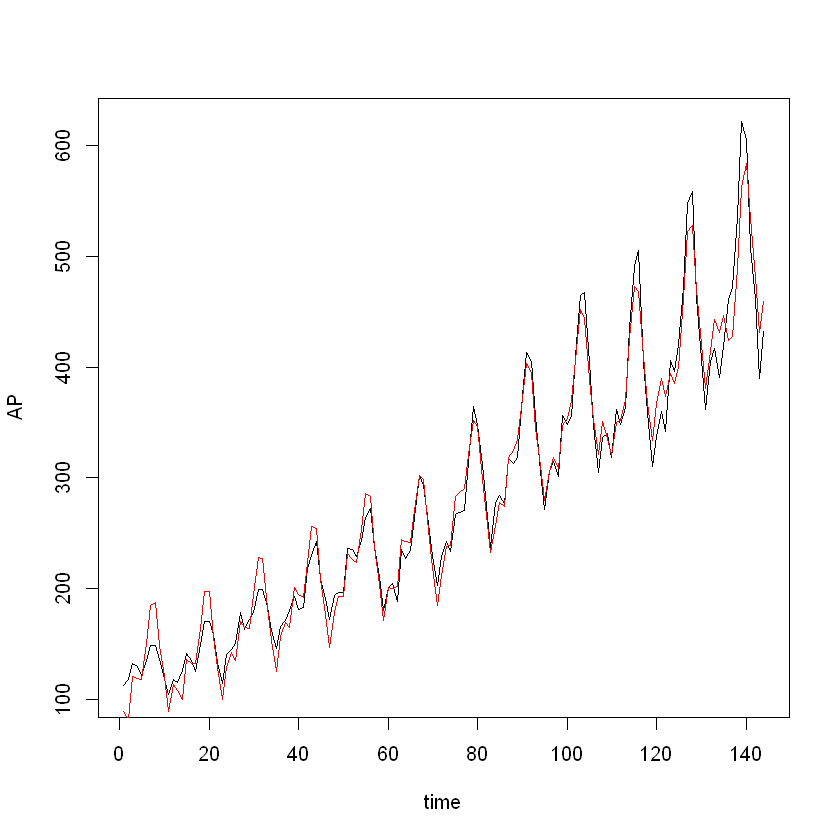

In [50]:
plot(AP ~ time, type="l")
lines(pr4 ~ time, col=2)

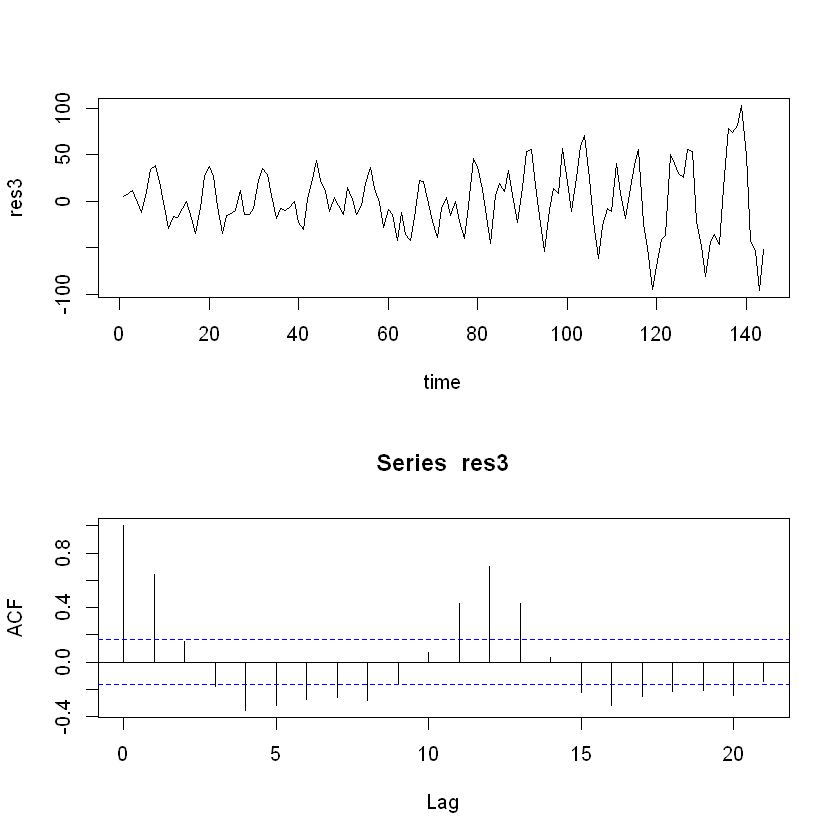

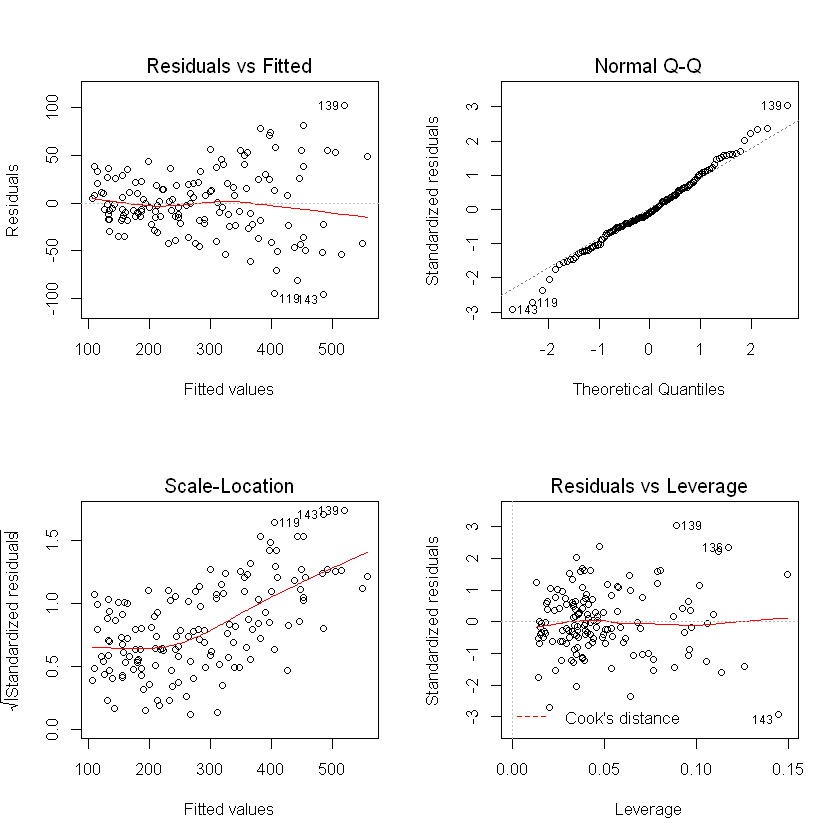

In [17]:
layout(mat=matrix(c(1,
                    2), nrow=2, byrow = TRUE))
res3 = resid(fit3)

plot(res3 ~ time,type="l")

acf(res3)

layout(mat=matrix(c(1, 2,
                    3, 4), nrow=2, byrow = TRUE))
plot(fit3)